In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Percentiles

In [2]:
nums = make_array(8, 6, 7, 5, 3, 0, 9)
np.sort(nums)

array([0, 3, 5, 6, 7, 8, 9])

In [3]:
nums

array([8, 6, 7, 5, 3, 0, 9])

In [4]:
percentile(75, nums)

8

In [5]:
percentile(25, nums)

3

In [6]:
percentile(50, nums)

6

In [7]:
np.median(nums)

6.0

# Bootstrapping

In [8]:
# it's almost never possible to have the entire population, but we're going to practice with one
# all we usually get are samples
population = Table.read_table('data/san_francisco_2019.csv')
population

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


In [9]:
population.sort('Total Compensation', descending=True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235
Community Health,Public Health,Administrative & Mgmt (Unrep),"Physician Administrator, DPH",434966,0,119213,554179
Public Protection,Sheriff,Correction & Detention,Senior Deputy Sheriff,152153,315896,77275,545324
General Administration & Finance,Retirement Services,Management,Director,397392,0,108913,506305
Community Health,Public Health,Medical & Dental,Supervising Physician Spec,404701,0,99480,504181
Community Health,Public Health,Medical & Dental,Senior Physician Specialist,400992,0,97428,498421


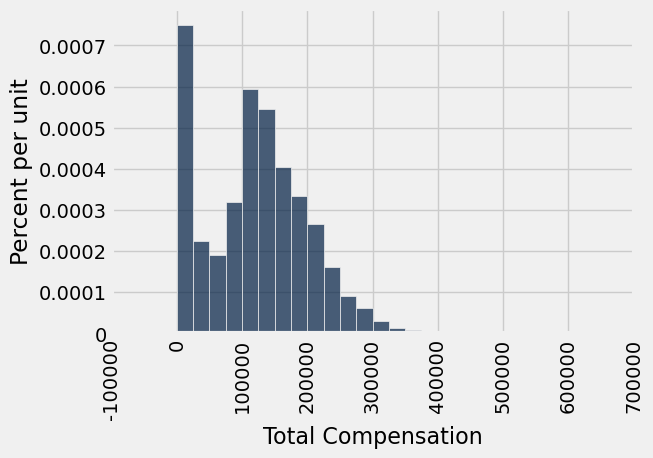

In [10]:
population.hist('Total Compensation', bins=np.arange(0, 600000, 25000))

In [11]:
population.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


In [12]:
min_salary = 15 * 20 * 50 # min. wage was $15, part time, 2 weeks of vacation
min_salary

15000

In [13]:
population = population.where('Salary', are.above(min_salary))
population

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


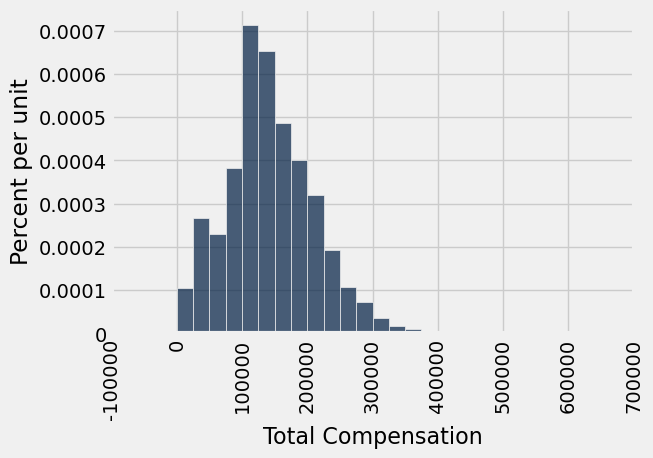

In [14]:
population.hist('Total Compensation', bins=np.arange(0, 600000, 25000))

In [15]:
pop_median = percentile(50, population.column('Total Compensation'))
pop_median

135747.0

## Let's pretend we took a sample of 400 people, and that's all we have

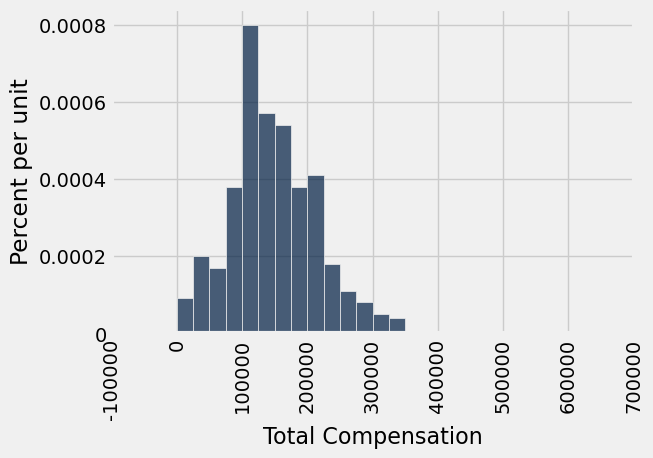

In [16]:
sample_size = 400
bootstrap_sample = population.sample(sample_size, with_replacement=False)
bootstrap_sample.hist('Total Compensation', bins = np.arange(0, 600000, 25000))

In [17]:
percentile(50, bootstrap_sample.column('Total Compensation'))

137579.0

In [18]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = bootstrap_sample.sample(k = bootstrap_sample.num_rows, with_replacement = True)
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [19]:
bootstrapped_sample_medians = make_array()
num_resamples = 1000

for i in np.arange(num_resamples):
    new_median = one_bootstrap_median()
    bootstrapped_sample_medians = np.append(bootstrapped_sample_medians, new_median)

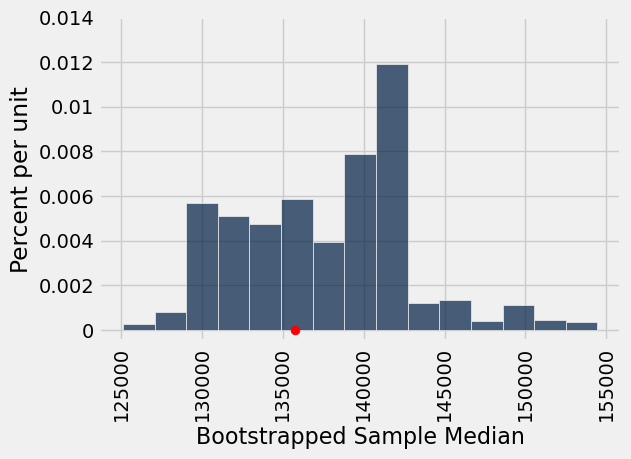

In [20]:
bootstrapped_median_table = Table().with_column('Bootstrapped Sample Median', bootstrapped_sample_medians)
bootstrapped_median_table.hist(bins = 15)

plt.ylim(-0.000005, 0.00014);
plt.scatter(pop_median, 0, color="red", s=40);

In [21]:
# middle 95% of our estimates gives us an estimate that's correct 95% of the time
# called a *confidence interval*
percentile(2.5, bootstrapped_sample_medians), percentile(97.5, bootstrapped_sample_medians)

(129115.0, 148779.0)

In [22]:
# we are 95% confident that the true median lies somewhere between these numbers

In [ ]:
# (this seems like a good place to stop the lecture)

# Confidence intervals

In [23]:
births = Table.read_table('data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [24]:
# we have no population data this time; just a sample

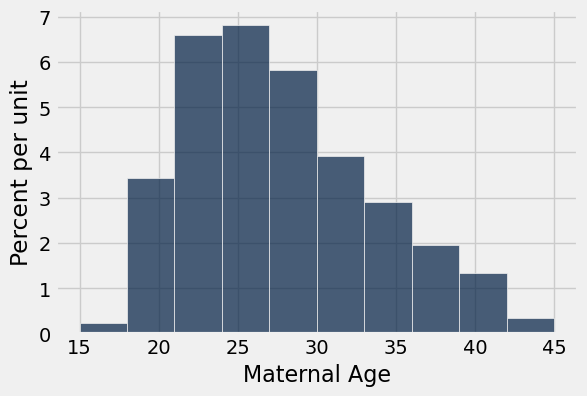

In [25]:
births.select('Maternal Age').hist()

In [26]:
np.average(births.column('Maternal Age'))

27.228279386712096

In [27]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

# Generate means from 5000 bootstrap samples
num_repetitions = 5000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 26.90034072,  27.56218058])

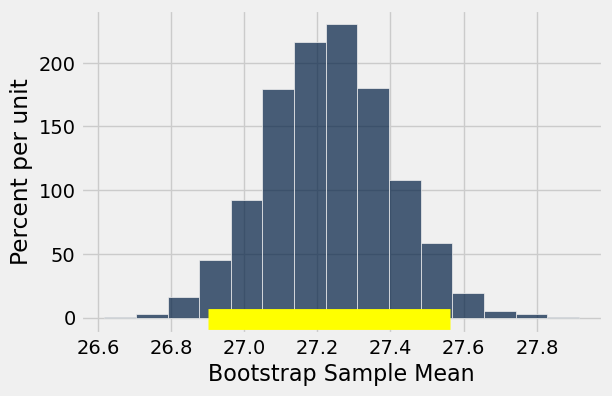

In [28]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plt.plot([left, right], [-0.01, -0.01], color='yellow', lw=15);

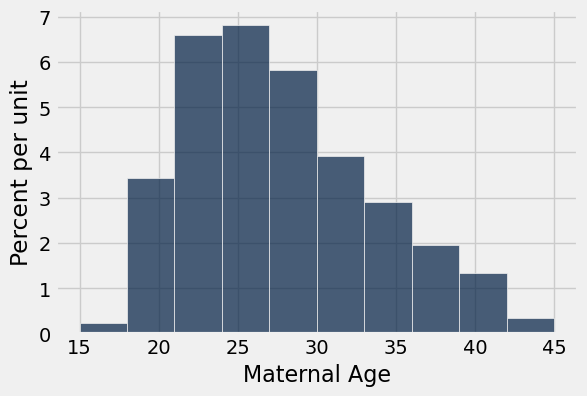

In [29]:
births.select('Maternal Age').hist() # ^ looks like a bell curve, even though the original distribution doesn't

In [30]:
# confidence intervals can also be used to test hypotheses
# Null hypothesis: The average age in the population is 30 years.
# Alternative hypothesis: The average age in the population is not 30 years.

In [31]:
percentile(0.5, bstrap_means), percentile(99.5, bstrap_means) # 99% confidence interval

(26.810902896081771, 27.67717206132879)